In [1]:
%matplotlib widget
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

In [2]:
from scipy.misc import derivative
import math

class TaylorSeries():
    def __init__(self, function, order, center=0):
        self.center = center
        self.f = function 
        self.order = order
        self.d_pts = order*2
        self.coefficients = []

       # количество точек (order) для scipy.misc.derivative
        if self.d_pts % 2 == 0: # должно быть больше, чем порядок производной, и нечетным
            self.d_pts += 1

        self.__find_coefficients()

    def __find_coefficients(self):
        for i in range(0, self.order+1):
            self.coefficients.append(round(derivative(self.f, self.center, n=i, order=self.d_pts)/math.factorial(i), 5))

    def print_equation(self):
        eqn_string = ""
        for i in range(self.order + 1):
            if self.coefficients[i] != 0:
                eqn_string += str(self.coefficients[i]) + ("(x-{})^{}".format(self.center, i) if i > 0 else "") + " + "
        eqn_string = eqn_string[:-3] if eqn_string.endswith(" + ") else eqn_string
        print(eqn_string)

    def print_coefficients(self):
        print(self.coefficients)

    def approximate_value(self, x):
        """
           Аппроксимирует значение f(x) с помощью полинома Тейлора.
       		 x = точка аппроксимации f(x)

        """
        fx = 0
        for i in range(len(self.coefficients)):
            fx += self.coefficients[i] * ((x - self.center)**i)  # коэффициент * n-ый член
        return fx

    def approximate_derivative(self, x):
        """
           Приблизительно вычисляет производную функции f(x) по ее ряду Тейлора.
        	 Бесполезно, так как нам нужна производная самой функции, чтобы построить ряд Тейлора.

        """
        value = 0
        for i in range(1, len(self.coefficients)): # пропустите первое значение (константу), так как производная равна 0
            value += self.coefficients[i] * i * ((x - self.center)**(i-1)) # дифференцируйте каждый член: x ^ n => n* x ^(n-1)
        return value

    def approximate_integral(self, x0, x1):
        """
           Вычисляет определенный интеграл функ-ции, используя разложение в ряд Тейлора.
       		 x0 - нижний предел интегрирования
   		     x1 - верхний предел интегрирования 

        """
        
        # интегралы могут отличаться на константу, поскольку int(f(x)) = F(x) + C
        value = 0
        for i in range(len(self.coefficients)):
            value += ((self.coefficients[i] * (1/(i+1)) * ((x1 - self.center)**(i+1))) - 
                      (self.coefficients[i] * (1/(i+1)) * ((x0 - self.center)**(i+1)))) # интегрируем каждый член: x ^ n => (1/n+1)*x ^(n+1)
        return value

    def get_coefficients(self):
        """
             Возвращает коэффициенты ряда Тейлора 
        """
        return self.coefficients

In [3]:
def f(x):
    return np.sin(x)

In [4]:
def F(coeff, x):
    return coeff[0] + coeff[1] * (x - 1)

In [5]:
def F2(coeff, x, n):
    res = 0
    for i in range(0, n + 1):
        res += coeff[i] * (x - 1)**i
    return res

In [8]:
x0 = 1
ts = TaylorSeries(f, 5, x0)
coeff = ts.get_coefficients()
ts.print_equation()

0.84147 + 0.54017(x-1)^1 + -0.42072(x-1)^2 + -0.08985(x-1)^3 + 0.03503(x-1)^4 + 0.00443(x-1)^5


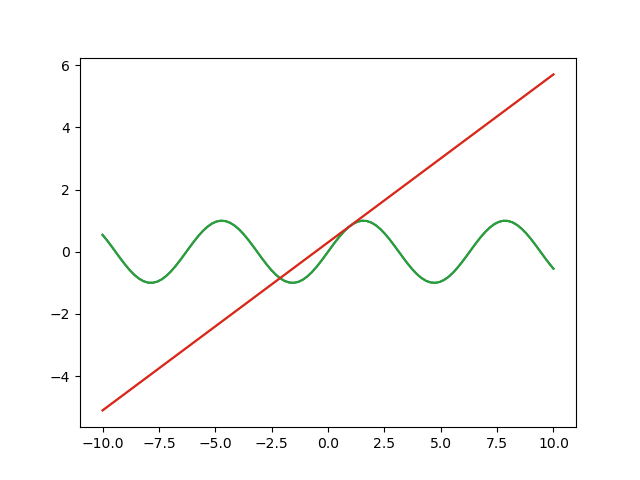

In [9]:
polyline = np.linspace(-10, 10, 100)
plt.plot(polyline, f(polyline))
plt.plot(polyline, F(coeff, polyline))
# plt.plot(polyline, F2(coeff, polyline, 2))
plt.show()